This is a proof-of-concept notebook that generates a single polymer containing 10 monomers with no charge

Beginning with the imports. The following imports are used for the following reasons:

1. `mpl_toolkits.mplot3d` for 3D plotting <br>
2. `numpy` for data manipulation (taking the square-root, etc.) <br>
3. `matplotlib.pyplot` for plotting purposes (creating the plotting canvas etc.) <br>
4. `pandas` for creating a data frame from the data and writing it to a CSV file. <br>
5. `random` to randomly generate numbers

In [2]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

The following two functions are used to generate the polymer... `gen_monomer_axis` and `create_polymer`

`gen_monomer_axis` creates a coordinate value (either X Y or Z) that is within `r = 1` distance from the preceding coordiate value. For example: If the previous monomer was located and X = 1, `gen_monomer_axis` generates a coordinate value that is within the range X = [0, 2].

`create_polymer` generates and plots a string of monomers all within `r = 1` distance from each other.

In [21]:
def gen_monomer_axis(axis, axlabel, cube_size):
    """ Generate the coordinate for the axis. 
    """
    r = 1
    # Generates a random digit between 0.1 and r (= 1).
    # Then in the `random.choice()` part, it randomly makes it negative or positive.
    #TODO: SET BOUND based on dimension size.
    d = random.uniform(0.1, r) * random.choice((-1, 1))
    
    # Y axis must always be positive because the polymer cant go "into the table"
#     if (axlabel == 'z') & (new_coordinate < 0):
#         d = np.abs(d)
    
    new_coordinate = axis + d
    
    if (new_coordinate < 0) | (new_coordinate > cube_size):
        new_coordinate = axis - d
    
    return new_coordinate

def create_polymer(n_monomers=10, cube_size=10, n_polymers=3, ballsize=100, save_data=False):
    """
    Instantiate a monomer at a random position (X, Y, Z=0) with the following constraints:
    1. The monomers cannot occupy the same space
    2. The monomers must all be at most a distance r=1 apart from each other

    TODO: All polymers are growing at the same time, so we might want to iterate by monomers
    first for ALL polymers
    
    Parameter(s)
    -----------
    n_monomers : int
        The number of monomers that the polymer will contain. Default is 10.
    save_data : bool
        When parameter is set to True, a pandas dataframe will be generated and stored
        in a CSV (data) file that can be opened and plotted for later use.

    Returns
    -------
    fig : matplitlib.figure object
    """
    # Initialize matplotlib canvas that we will plot a 3D plane on
    fig = plt.figure()

    # This new axis (`ax`) is a 3D projection
    ax = plt.axes(projection="3d")
    
    # Let's set the axis limits for each dimension 10
    # TODO: Be able to make it wide and short :D
    ax.axes.set_xlim3d(left=0, right=cube_size) 
    ax.axes.set_ylim3d(bottom=0, top=cube_size) 
    ax.axes.set_zlim3d(bottom=0, top=cube_size)

    for i in np.arange(0, n_polymers):
        # Initialize the starting coordinate for the FIRST monomer in the polymer.
        # We randomize the starting position of X and Y (start_x and start_y), but the
        # starting position of Z (start_z) will always be 0. The upper-limit of the
        # randomization for start_x and start_y is 10, because that's the length of the
        # X and Y axis.
        start_x, start_y, start_z = np.random.randint(0, cube_size), np.random.randint(0, cube_size), 0

        # Initialize 3 empty lists, one for each axis. These lists will house the coordinates
        # of each of the monomers within the polymer. Currently, the plan is to house 10 monomers per polymer. 
        xs, ys, zs = [], [], []

        # Let's put our initial coordinate into the lists
        xs.append(start_x)
        ys.append(start_y)
        zs.append(start_z)

        # Create a while loop, that will run until the last list (zs) reaches 10.
        # Which means we officially have 10 coordinates, for 10 monomers
        while len(zs) < n_monomers:

            for axis, axlabel in zip([xs, ys, zs], ['x', 'y', 'z']):
                # TODO: Ensure that the polymers DO NOT touch, and each monomer from all the polymers
                # are at most a distance r=1 from each other.
                # TODO: Also ensure that ALL the monomers WITHIN a polymer arent occupying the same
                # space, even if they're not consecutive. I think currently I'm only ensuring the 
                # consecutive ones don't touch.
                # TODO: Can you add charge to these monomers? Maybe use the +1 and -1 to determine
                # charge.
                new_monomer = gen_monomer_axis(axis[-1], axlabel, cube_size)
                axis.append(new_monomer)

        # Plot the coordinates, setting s=100. makes the data points bigger and easier to see. You
        # can play with this. Alpha changes transparency of the monomer.
        ax.scatter(xs, ys, zs, s=ballsize, edgecolor='k', lw=0.5)

    # Plot the figure
    plt.show()
    
    if save_data:
        d = {'x': xs, 'y': ys, 'z': zs}
        df = pd.DataFrame(data=d)
        df.to_csv("initial_polymer.dat")
        
        return "New file was written... initial_polymer.dat"

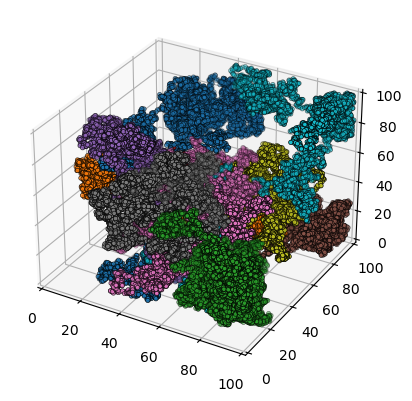

'New file was written... initial_polymer.dat'

In [29]:
create_polymer(n_monomers=10000, cube_size=100, n_polymers=10, ballsize=10, save_data=True)

In [ ]:
# Initialize the starting coordinate for the FIRST monomer in the polymer.
# We randomize the starting position of X and Y (start_x and start_y), but the
# starting position of Z (start_z) will always be 0. The upper-limit of the
# randomization for start_x and start_y is 10, because that's the length of the
# X and Y axis.
start_x, start_y, start_z = np.random.randint(0, cube_size), np.random.randint(0, cube_size), 0

# Initialize 3 empty lists, one for each axis. These lists will house the coordinates
# of each of the monomers within the polymer. Currently, the plan is to house 10 monomers per polymer. 
xs, ys, zs = [], [], []

# Let's put our initial coordinate into the lists
xs.append(start_x)
ys.append(start_y)
zs.append(start_z)

monomer_dictionary = {}

for x, y, z in zip(xs, ys, zs):
    monomer_dictionary["coordinates"] = (x, y, z)
    monomer_dictionary["charge"] = 
    monomer_dictionary["polymer_num"] = 

while len(zs) < n_monomers:

    for i in np.arange(0, n_polymers):

        # Create a while loop, that will run until the last list (zs) reaches 10.
        # Which means we officially have 10 coordinates, for 10 monomers
        for axis, axlabel in zip([xs, ys, zs], ['x', 'y', 'z']):
            # TODO: Ensure that the polymers DO NOT touch, and each monomer from all the polymers
            # are at most a distance r=1 from each other.
            # TODO: Also ensure that ALL the monomers WITHIN a polymer arent occupying the same
            # space, even if they're not consecutive. I think currently I'm only ensuring the 
            # consecutive ones don't touch.
            # TODO: Can you add charge to these monomers? Maybe use the +1 and -1 to determine
            # charge.
            new_monomer = gen_monomer_axis(axis[-1], axlabel, cube_size)
            axis.append(new_monomer)
